# Advertising

Growing a brand takes in alot effort and these is done through various channels with the target being to acquire more people to prescribe to the brand.

Effort goes into adevertising to attract the attention of the person interacting the the platform, this can either be through social media or the main stream media(Tv and Radio station)

Data play a huge role, it helps in decision making regarding the information to share, there are other factors as well which data is going to help us understanding.

##### This is a classification problem(Determine if an ad was clicked on or not), focus in the meantime will be an EDA to understand the features even better through visualization

In [318]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
df = pd.read_csv("Ecommerce Customers")
len(df)

500

In [348]:
advert = pd.read_csv("advertising.csv", parse_dates=["Timestamp"])


In [347]:
advert_temp = advert.copy()
advert_temp.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


### Adding feartures such as quarters and weeks to understand how they varied for the period of time

In [351]:
advert_temp["Quarter"] = advert_temp.Timestamp.dt.quarter #Investigate on the quarters
advert_temp["dayOfWeek"] = advert_temp.Timestamp.dt.dayofweek # Investigate Which days of the week were productive

In [353]:
advert_temp.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Quarter,dayOfWeek
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,1,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2,0


In [354]:
quarter_numbers = advert_temp.Quarter.value_counts()

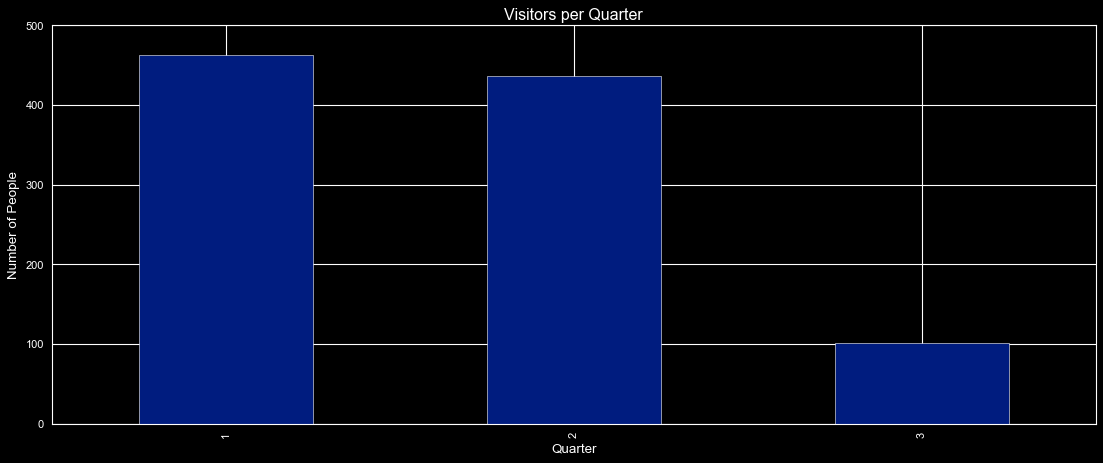

In [355]:
fig, ax = plt.subplots(figsize = (15, 6))
quarter_numbers.plot(kind="bar")
ax.set(title= "Visitors per Quarter",
      ylabel ="Number of People");

<li>Quarter 1 has more users as compared to the other quarters suggesting more needs to be done in this quarter</li>

<li>Quarter 3 has the least number of users, suggesting less activities should be done in this quarter </li>

In [356]:
dayOfWeek = advert_temp["dayOfWeek"].value_counts()

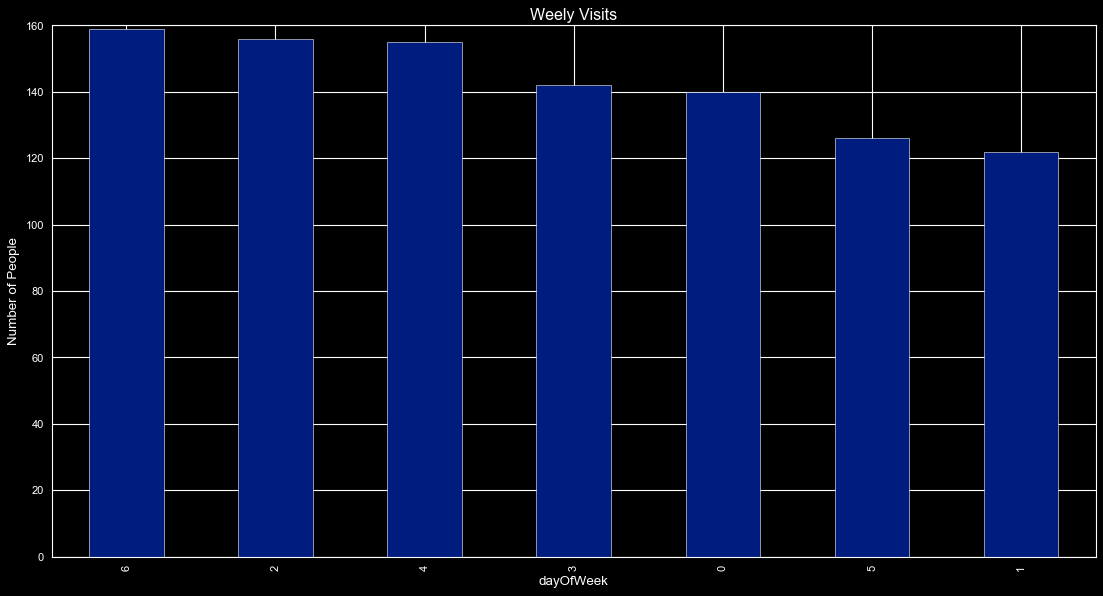

In [327]:
fig, ax = plt.subplots(figsize = (15, 8))
dayOfWeek.plot(kind="bar")
ax.set(title= "Weely Visits",
      ylabel ="Number of People");

Days are in numbers

<li>0 - Monday</li>
<li>1 - Tuesday</li>
<li>2 - Wednesday</li>
<li>3 - Thursday</li>
<li>4 - Friday</li>
<li>5 - Saturday</li>
<li>6 - Sunday</li>

#### Notes
     1. Sunday, Wednesday and Friday have more users as compared to the balance of the days
     2. Tuesday and Saturday have low number of users

In [328]:
advert_temp.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Quarter', 'dayOfWeek'],
      dtype='object')

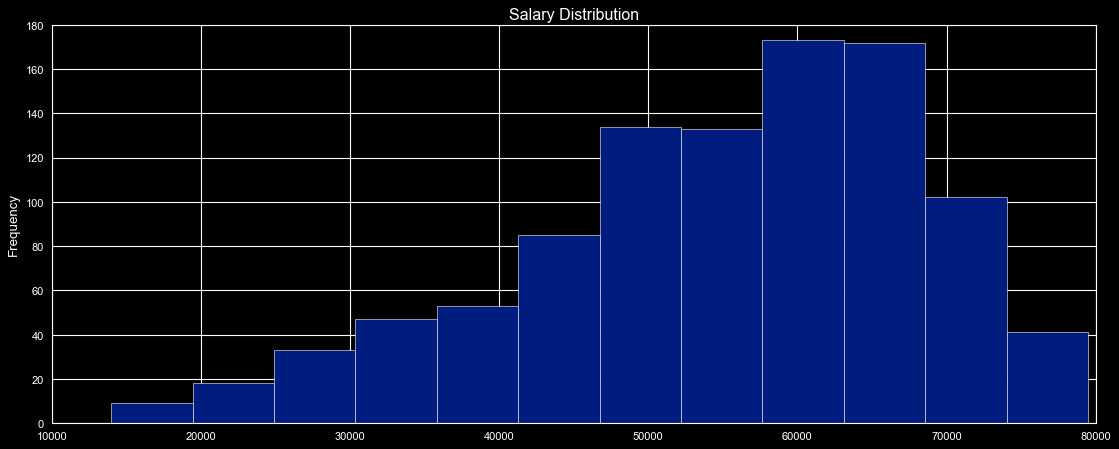

In [340]:
advert_temp["Area Income"].plot.hist(figsize=(15, 6), bins=12);
plt.title("Salary Distribution");


##### Salary is almost normally distributed, with majority being round 42,000 - 75,000

In [389]:
corr_dat = advert_temp.iloc[0:, 0:10]
corr_dat.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [398]:
corr_dat.drop("City", axis=1, inplace=True)
corr_dat.drop("Ad Topic Line", axis=1, inplace=True)
corr_dat.drop("Country", axis=1, inplace=True)
corr_dat.drop("Timestamp", axis=1, inplace=True)

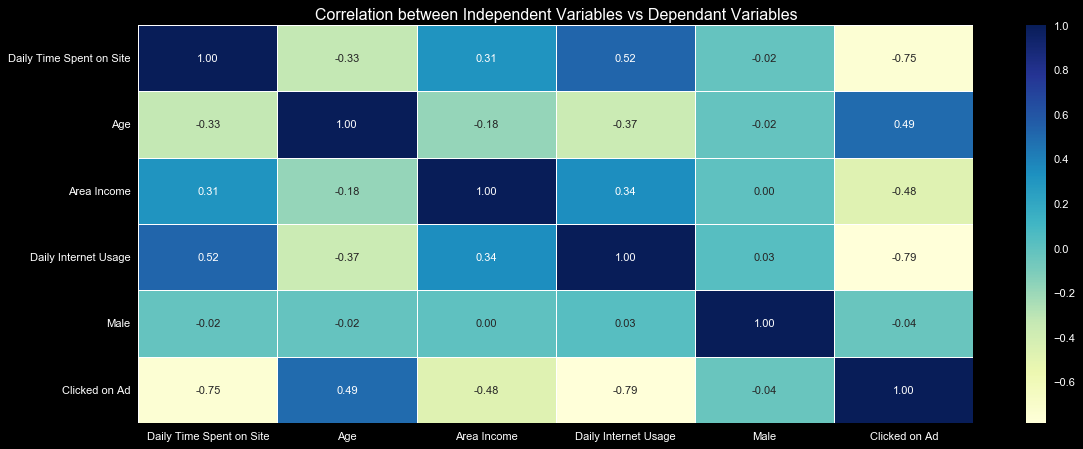

In [409]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.heatmap(corr_dat.corr(),
                annot=True,
                 linewidths=0.5,
                fmt="0.2f",
                 cmap="YlGnBu"
                )
ax.set(title = "Correlation between Independent Variables vs Dependant Variables");

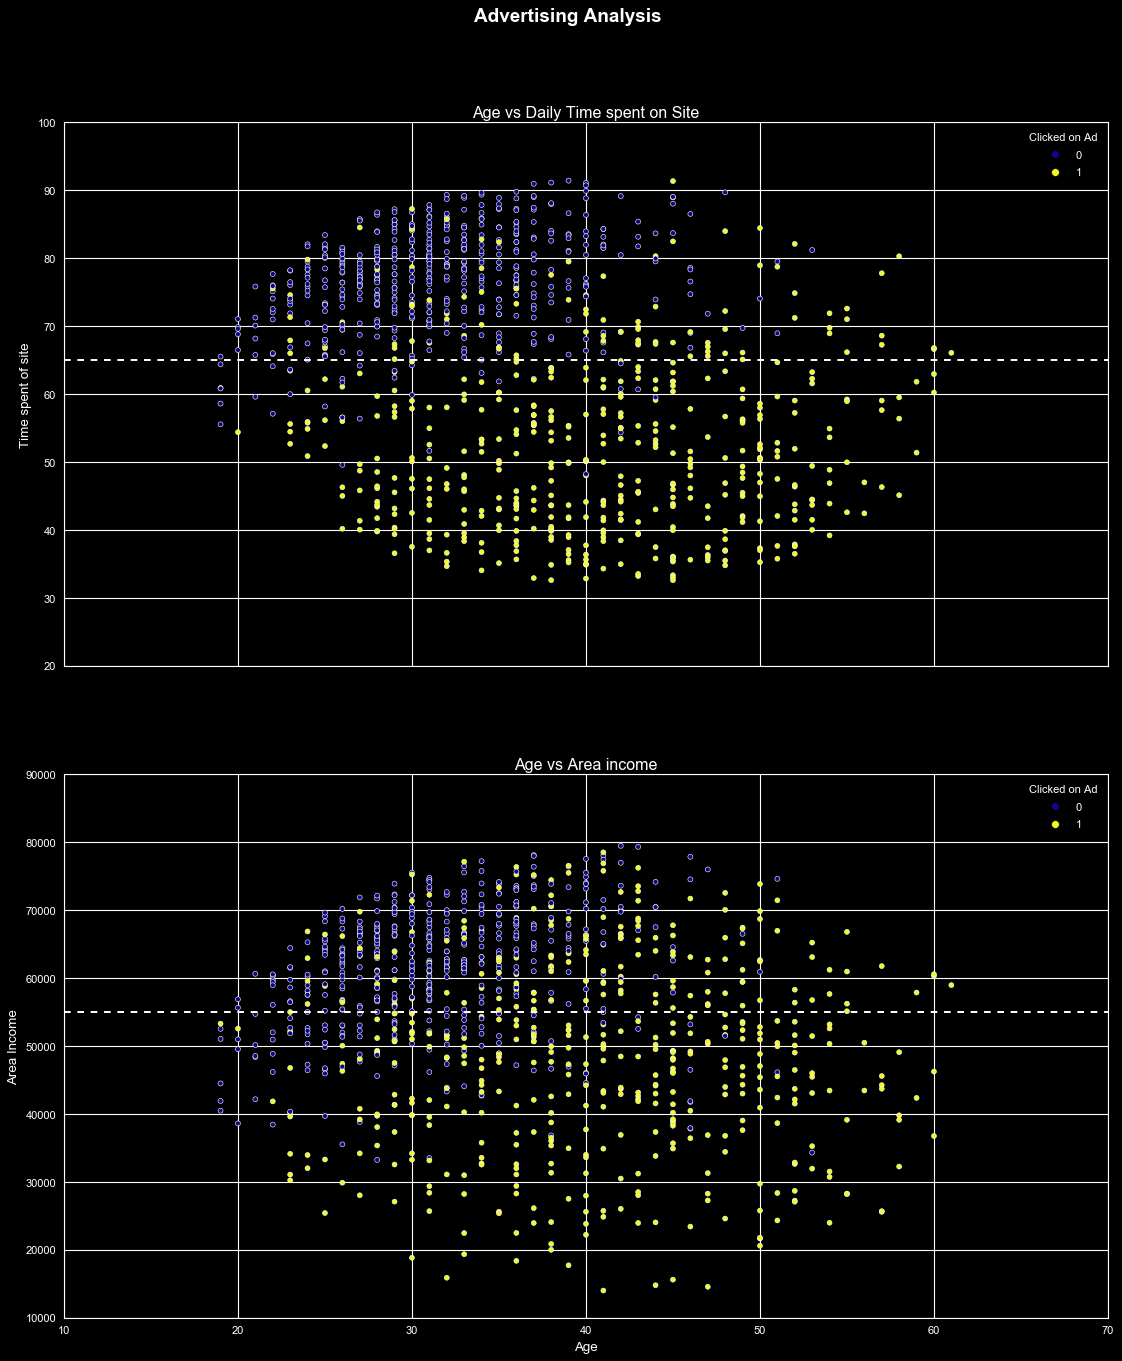

In [371]:
plt.style.use("seaborn-dark-palette")
fig, (ax0, ax1) = plt.subplots(figsize=(15, 18),
                              nrows = 2,
                              sharex=True)
scatter = ax0.scatter(x = advert_temp["Age"],
                    y = advert_temp["Daily Time Spent on Site"],
                    c = advert_temp["Clicked on Ad"],
                     cmap= "plasma");
ax0.set(title="Age vs Daily Time spent on Site",
      ylabel = "Time spent of site");
ax0.legend(*scatter.legend_elements(), title="Clicked on Ad")
ax0.axhline(advert_temp["Daily Time Spent on Site"].mean(), linestyle='--')
scatter = ax1.scatter(x = advert_temp["Age"],
                     y = advert_temp["Area Income"],
                     c = advert_temp["Clicked on Ad"],
                     cmap="plasma");
ax1.set(title = "Age vs Area income",
        xlabel = "Age",
       ylabel = "Area Income");
ax1.legend(*scatter.legend_elements(), title="Clicked on Ad")
ax1.axhline(advert_temp["Area Income"].mean(), linestyle='--');
fig.suptitle("Advertising Analysis", fontweight = "bold", fontsize=17);

#### 1. *Average time spent on the internet 55 mins*
#### 2. *Average Salary is around 55000*
#### 3. *More time spent on the internet does not translate to the ad being clicked on*
#### 4. *Age is also vital when it comes to dispersing information, below 40 tend to spend more time on the internrt but does not mean they click on the ad*
#### 5. *The Over for for spend less time on the internet actually tend to click on the ad suggesting they have found that which interest them*
#### 6. *Income play a huge role too, as per the plot, those with their salary below the average tend to click on the ads as compared to those above average*
